In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ax-flex-label-damage-dataset/labelsD.xlsx
/kaggle/input/ax-flex-label-damage-dataset/Flex2500_D_03Aug20.txt
/kaggle/input/ax-flex-label-damage-dataset/Ax2500_D_03Aug20.txt


In [2]:

%matplotlib inline
import random 
import tensorflow as tf

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Activation, MaxPooling1D, Dropout, Lambda 
from tensorflow.keras.layers import Dense, Conv1D, SimpleRNN, LSTM

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

****All functions****

In [1]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras import backend as K

def dataset_split(X_data, y_data, validation_fraction, test_fraction): 
    X_temp, X_test, y_temp, y_test = train_test_split(X_data, y_data, test_size=test_fraction, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=validation_fraction, random_state=42)
    return [X_train, y_train, X_valid, y_valid, X_test, y_test]

def noise_full_split(X_full, y_full, validation_fraction, test_fraction): 
    X_temp, X_test, y_temp, y_test = train_test_split(X_full, y_full, test_size=test_fraction, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=validation_fraction, random_state=42)
    return [X_train, y_train, X_valid, y_valid, X_test, y_test]

def noise_reduced_split(Xn, yn, size, validation_fraction, test_fraction): 
    sampled_indices = random.sample(range(1, Xn.shape[0]), size)
    Xn_sub = Xn[sampled_indices,:]
    yn_sub = yn[sampled_indices]
    X_temp, X_test, y_temp, y_test = train_test_split(Xn_sub, yn_sub, test_size=test_fraction, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=validation_fraction, random_state=42)
    return [X_train, y_train, X_valid, y_valid, X_test, y_test]

def compute_r_squared(y_actual, y_predicted):
    residual_sum = K.sum(K.square(y_actual - y_predicted))
    total_sum = K.sum(K.square(y_actual - K.mean(y_actual)))
    return (1 - residual_sum / (total_sum + K.epsilon()))

def build_CNN_1D(n_timesteps, n_features, neurons1, dropout1, neurons2, dropout2):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=3, input_shape=(n_timesteps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(neurons1, activation='relu'))
    model.add(Dropout(dropout1))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dropout(dropout2))
    model.add(Dense(2, activation='linear'))
    return model


**My_prediction_function**

In [5]:
import numpy as np
import pandas as pd
# import xlsxwriter

def pred(model, Xtest, ytest, name):
    m_test = Xtest.shape[0]
    Xtest = np.reshape(Xtest, (m_test, n_timesteps, n_features))
    y_predicted = model.predict(Xtest, verbose=2)
    y_predicted = np.array(y_predicted)
    y_actual = np.array(ytest)
    
    diff = y_predicted - y_actual
    percentDiff = (diff / y_actual) * 100
    absPercentDiff = np.abs(percentDiff)
    APD = pd.DataFrame(absPercentDiff).round(2)
    
    workbook = xlsxwriter.Workbook(name)
    worksheet = workbook.add_worksheet("My sheet")

    worksheet.write(0, 0, 'True values (x)')
    worksheet.write(0, 1, 'True values (a)')
    worksheet.write(0, 2, 'Predicted values (x)')
    worksheet.write(0, 3, 'Predicted values (a)')
    worksheet.write(0, 4, 'APD (x)')
    worksheet.write(0, 5, 'APD (a)')
    
    for i in range(len(y_actual)):
        worksheet.write(i + 1, 0, y_actual[i, 0])
        worksheet.write(i + 1, 1, y_actual[i, 1])
        worksheet.write(i + 1, 2, y_predicted[i, 0])
        worksheet.write(i + 1, 3, y_predicted[i, 1])
        worksheet.write(i + 1, 4, APD[i, 0])
        worksheet.write(i + 1, 5, APD[i, 1])
    
    workbook.close()

    return pd.read_excel(name)


In [9]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (
            logs.get('val_mean_absolute_error') < 1.25
            and logs.get('mean_absolute_error') < 1.25
            and logs.get('val_loss') < 3
            and logs.get('loss') < 3
            and abs(logs.get('val_loss') - logs.get('loss')) < 0.5
        ):
            print("\nReached perfect accuracy so cancelling training!")
            self.model.stop_training = True

epoch_schedule = myCallback()

filepath = "/kaggle/working/epochs_{epoch:03d}_loss_{loss:.3f}.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_freq='epoch'  # Save after every epoch; adjust to an integer for batch frequency
)

# 3. Learning Rate Schedule
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10 ** (epoch / 2.5)
)


**DataSet**

In [10]:
df_D_Ax = pd.read_csv('/kaggle/input/ax-flex-label-damage-dataset/Ax2500_D_03Aug20.txt',header=None)
df_D_Flex = pd.read_csv('/kaggle/input/ax-flex-label-damage-dataset/Flex2500_D_03Aug20.txt',header=None)
y = pd.read_excel('/kaggle/input/ax-flex-label-damage-dataset/labelsD.xlsx',header=None)

In [11]:
print(df_D_Ax.shape)
print(df_D_Flex.shape)
print(y.shape)

(2500, 8192)
(2500, 8192)
(2500, 2)


In [12]:
nfft = 1024*8
T = 0.5e-6*nfft
q = 100e3
deltaT = T/nfft
t = np.arange(0,(nfft-1)/nfft,1/nfft)
time = t*T
print(time)

[0.0000e+00 5.0000e-07 1.0000e-06 ... 4.0940e-03 4.0945e-03 4.0950e-03]


**All plots functions**

In [13]:
import matplotlib.pyplot as plt

def mseplot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['loss'], '-o')
    plt.plot(history.history['val_loss'], '-s')
    plt.title('MSE loss for Damage localization (1DCNN)', fontsize=font+2)
    plt.ylabel('MSE', fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs', fontsize=font)
    plt.legend(['train', 'test'], loc='upper right', fontsize=font)
    plt.axis([ep1, ep2, lb, ub])
    return plt.show()

def maeplot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['mae'], '-o')
    plt.plot(history.history['val_mae'], '-s')
    plt.title('MAE for Damage localization (1DCNN)', fontsize=font+2)
    plt.ylabel('MAE', fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs', fontsize=font)
    plt.legend(['train', 'test'], loc='upper right', fontsize=font)
    plt.axis([ep1, ep2, lb, ub])
    return plt.show()

def mapeplot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['mape'], '-o')
    plt.plot(history.history['val_mape'], '-s')
    plt.title('MAPE for Damage localization (1DCNN)', fontsize=font+2)
    plt.ylabel('MAPE', fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs', fontsize=font)
    plt.legend(['train', 'test'], loc='upper right', fontsize=font)
    plt.axis([ep1, ep2, lb, ub])
    return plt.show()

def r2plot(history, lb, ub, font, ep1, ep2):
    plt.figure(figsize=(14,8))
    plt.plot(history.history['r_square'], '-o')
    plt.plot(history.history['val_r_square'], '-s')
    plt.title('R^2 for Damage localization (1DCNN)', fontsize=font+2)
    plt.ylabel('R^2', fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xlabel('Number of epochs', fontsize=font)
    plt.legend(['train', 'test'], loc='upper right', fontsize=font)
    plt.axis([ep1, ep2, lb, ub])
    return plt.show()


521


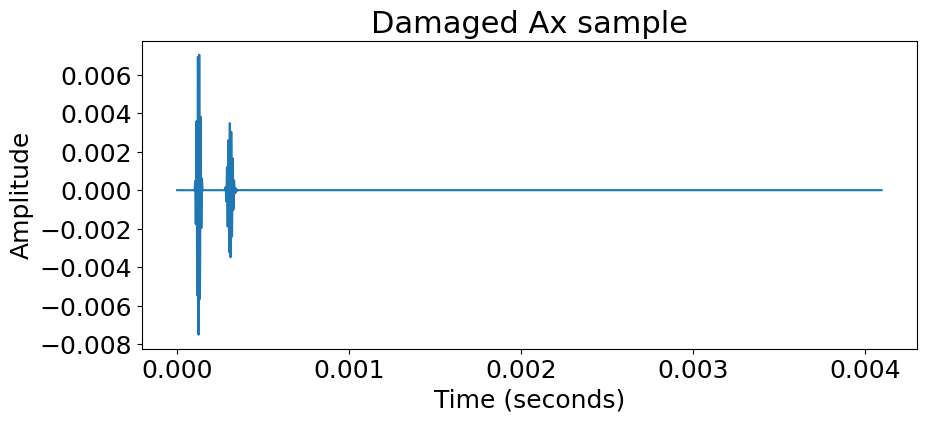

In [16]:
import random
import matplotlib.pyplot as plt

N = random.randint(1, 2500)
plt.figure(figsize=(10, 4))
plt.plot(time, df_D_Ax.iloc[N, 0 : df_D_Ax.shape[1]-1])
plt.title('Damaged Ax sample', fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time (seconds)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.show()


2473


Text(0, 0.5, 'Amplitude')

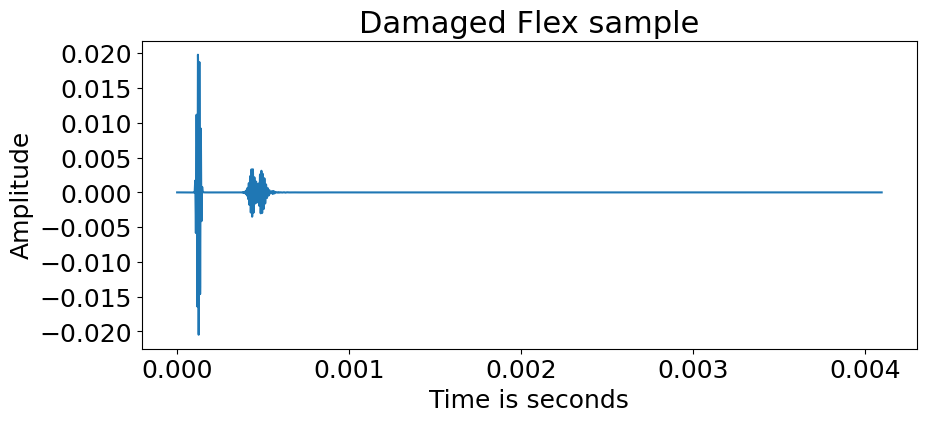

In [16]:
plt.figure(figsize=(10,4))
plt.plot(time, df_D_Flex.iloc[N, 0 : df_D_Flex.shape[1]-1])
plt.title('Damaged Flex sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

2473


Text(0, 0.5, 'Amplitude')

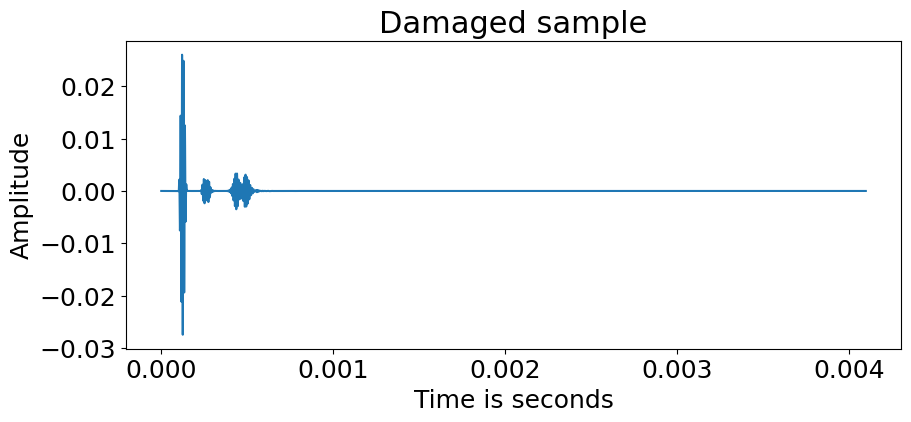

In [17]:
df_D = df_D_Ax + df_D_Flex
plt.figure(figsize=(10,4))
plt.plot(time, df_D.iloc[N, 0 : df_D.shape[1]-1])
plt.title('Damaged sample',fontsize=22)
print(N)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time is seconds',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)

In [20]:
index = np.where(time == 1e-03)
index = int(index[0])
print(index)

2000


/tmp/ipykernel_30/3151110674.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = int(index[0])


In [21]:
DAx = df_D_Ax.iloc[:, 0 : index]
DFlex = df_D_Flex.iloc[:, 0 : index]
X = DAx + DFlex
# X = np.concatenate([DAx,DFlex], axis=1)
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(2500, 2000)
(2500, 2)


In [22]:
n_timesteps = index
n_features = 1
n_outputs = 2

In [23]:
beta1 = 0.01
beta2 = 0.02
beta3 = 0.03
mu = 0
sigma = 1
r = sigma*np.random.randn(2000,1) + mu   #random parameter with gaussian distribution
r = np.transpose(r)

#---Noisy signal
n1 = beta1*r*np.max(X)
n2 = beta2*r*np.max(X)
n3 = beta3*r*np.max(X)
Xn1 = X + n1
Xn2 = X + n2
Xn3 = X + n3


import math

rms_Xn = np.sqrt(np.mean(Xn3**2))
Power_Xn = rms_Xn**2

rms_n = np.sqrt(np.mean(n3**2))
Power_n = rms_n**2

SNR_dB = 10*math.log10(Power_Xn/Power_n)
print("SNR : ",SNR_dB)

SNR :  11.12609928404353


1221


Text(0.5, 1.0, 'Dam')

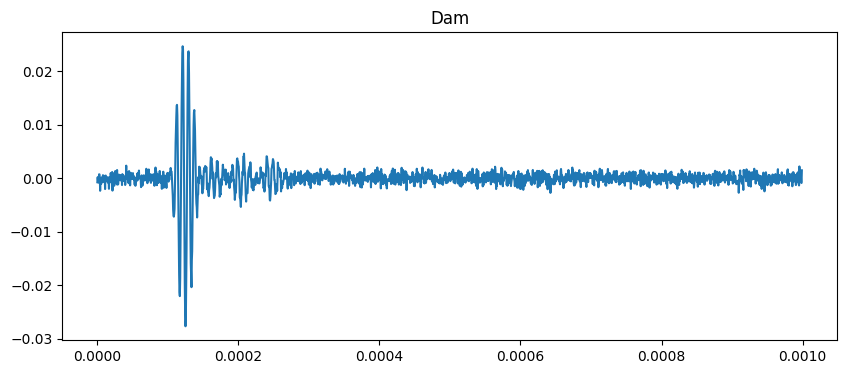

In [24]:

D = random.randint(1, 2500)
print(D)

plt.figure(figsize=(10,4))
plt.plot(time[0:index-1], Xn3[D, 0 : index-1])
plt.title('Dam')

In [25]:
Xn = np.concatenate([X,Xn1,Xn2,Xn3], axis=0)
yn = np.concatenate([y,y,y,y], axis=0)
print(Xn.shape)
print(yn.shape)

(10000, 2000)
(10000, 2)


In [26]:

[Xtrain,ytrain,Xvalid,yvalid,Xtest,ytest] = dataset_split(Xn, yn, 0.1, 0.05)
print(Xtrain.shape)
print(Xvalid.shape)
print(Xtest.shape)
print(ytrain.shape)
print(yvalid.shape)
print(ytest.shape)

(8550, 2000)
(950, 2000)
(500, 2000)
(8550, 2)
(950, 2)
(500, 2)


In [27]:

model = build_CNN_1D(2000, 1, 512, 0.25, 128, 0.2)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1998, 16)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 999, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 997, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 498, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 496, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 248, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 246, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 123, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 121, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,864,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,061,858 (30.75 MB)

 Trainable params: 8,061,858 (30.75 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import tensorflow.keras.backend as K

def r_square(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))  
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))  


In [28]:
from tensorflow.keras.optimizers import Adam

def train(Xtrain, ytrain, Xvalid, yvalid, model, alpha, nepoch, batchsize):
    m_train = Xtrain.shape[0]
    m_valid = Xvalid.shape[0]
    Xtrain = np.reshape(Xtrain, (m_train, n_timesteps, n_features))
    Xvalid = np.reshape(Xvalid, (m_valid, n_timesteps, n_features))
    model.compile(loss='mse', optimizer=Adam(learning_rate=alpha, beta_1=0.9, beta_2=0.999), metrics=['mape', 'mae', r_square])
    history = model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=nepoch, batch_size=batchsize, verbose=2, shuffle=True)
    return [model, history]


**Model_Training**

In [28]:

[model, history] = train(Xtrain, ytrain, Xvalid, yvalid, model, 1e-5, 500, 32)

Epoch 1/500


I0000 00:00:1731781255.942567     139 service.cc:145] XLA service 0x7ced50024630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731781255.942622     139 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731781262.557301     139 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


268/268 - 20s - 73ms/step - loss: 0.0591 - mae: 0.1608 - mape: 97.8087 - r_square: 0.1464 - val_loss: 0.0245 - val_mae: 0.1073 - val_mape: 74.4185 - val_r_square: 0.6462
Epoch 2/500
268/268 - 4s - 15ms/step - loss: 0.0272 - mae: 0.1176 - mape: 104.4459 - r_square: 0.6032 - val_loss: 0.0244 - val_mae: 0.1071 - val_mape: 74.4679 - val_r_square: 0.6465
Epoch 3/500
268/268 - 4s - 15ms/step - loss: 0.0268 - mae: 0.1162 - mape: 101.4849 - r_square: 0.6096 - val_loss: 0.0243 - val_mae: 0.1069 - val_mape: 76.1265 - val_r_square: 0.6477
Epoch 4/500
268/268 - 4s - 15ms/step - loss: 0.0268 - mae: 0.1160 - mape: 99.8491 - r_square: 0.6081 - val_loss: 0.0242 - val_mae: 0.1066 - val_mape: 76.7911 - val_r_square: 0.6501
Epoch 5/500
268/268 - 4s - 15ms/step - loss: 0.0264 - mae: 0.1147 - mape: 98.2084 - r_square: 0.6165 - val_loss: 0.0241 - val_mae: 0.1063 - val_mape: 76.9593 - val_r_square: 0.6524
Epoch 6/500
268/268 - 4s - 15ms/step - loss: 0.0260 - mae: 0.1138 - mape: 97.0894 - r_square: 0.6220 - v

In [34]:
model.save('1dcnn_model_damage_localization.h5')

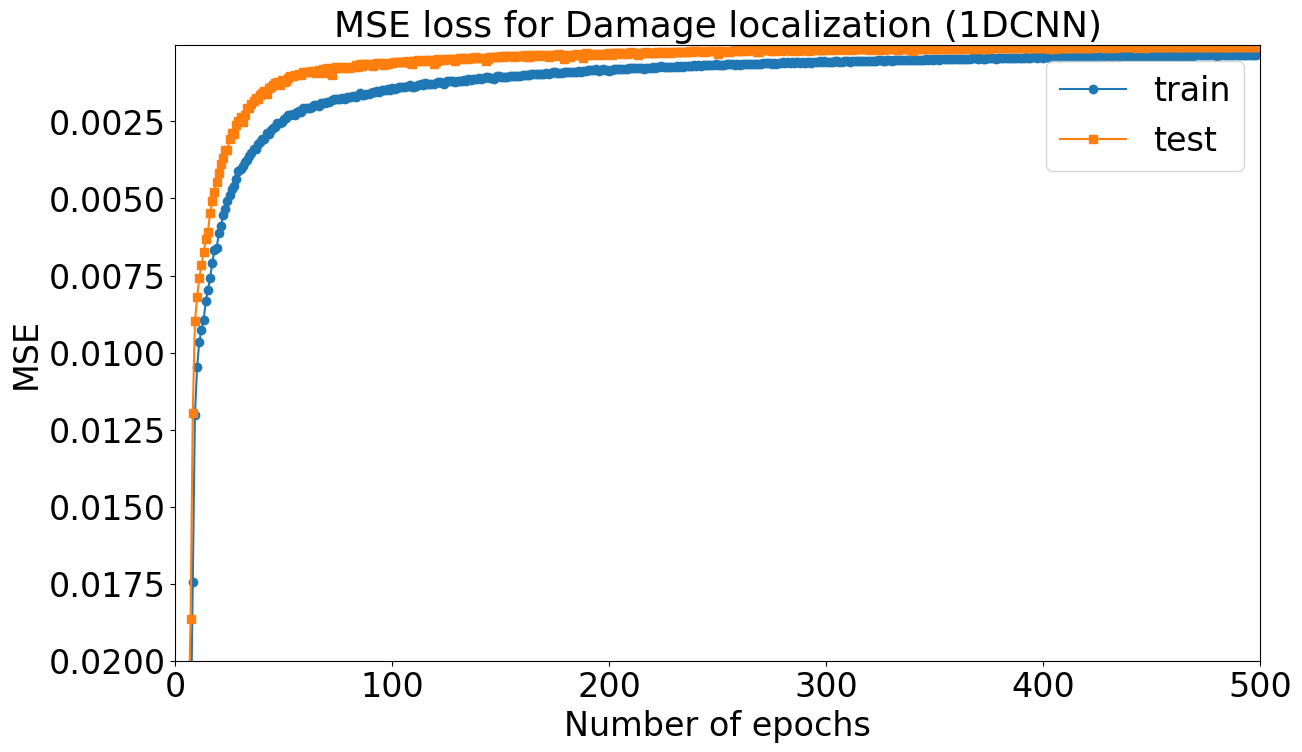

In [29]:

mseplot(history, 0.02, 1e-5, 24, 0, 500)


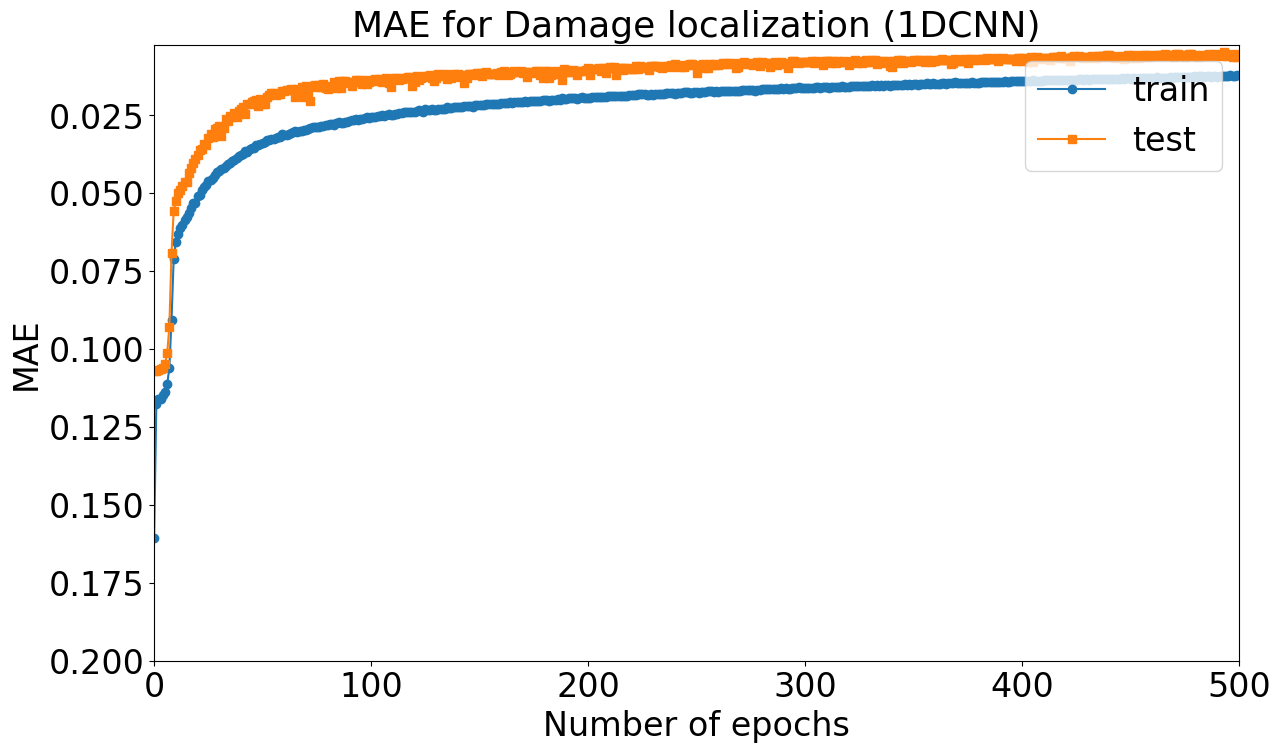

In [30]:

maeplot(history, 0.2, 0.0025, 24, 0, 500)

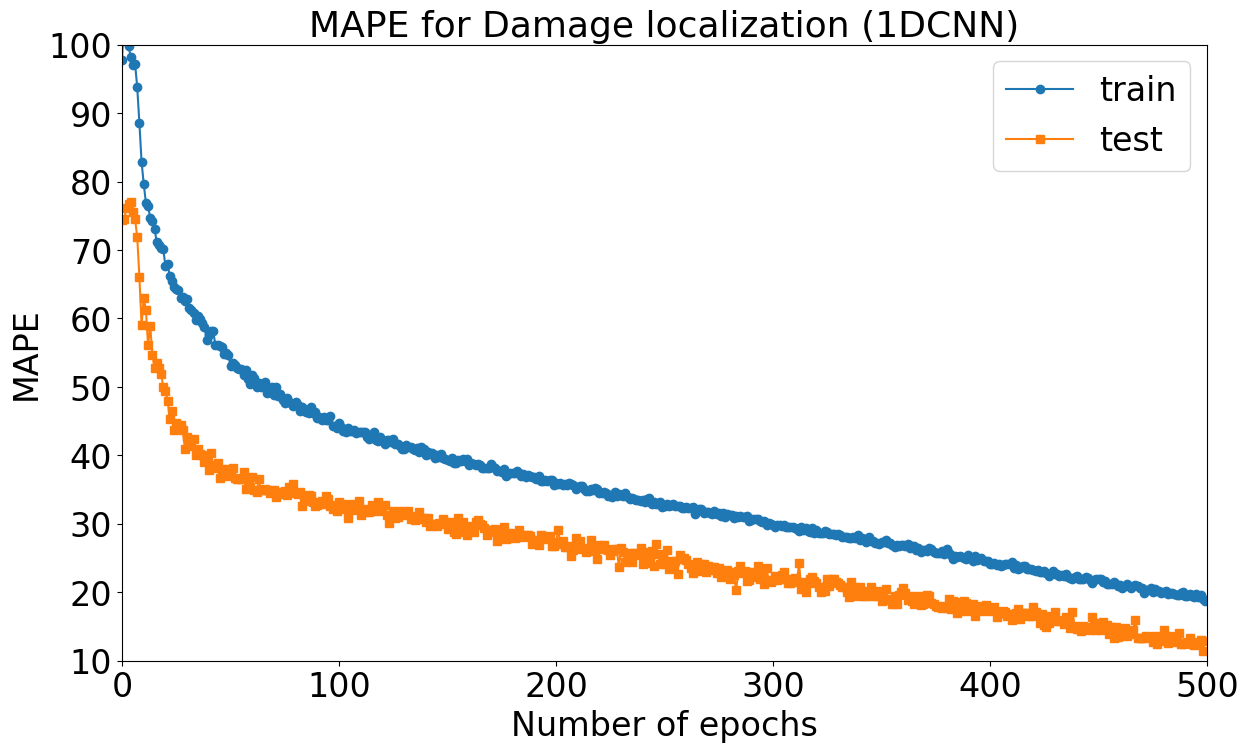

In [31]:

mapeplot(history, 10, 100, 24, 0, 500)

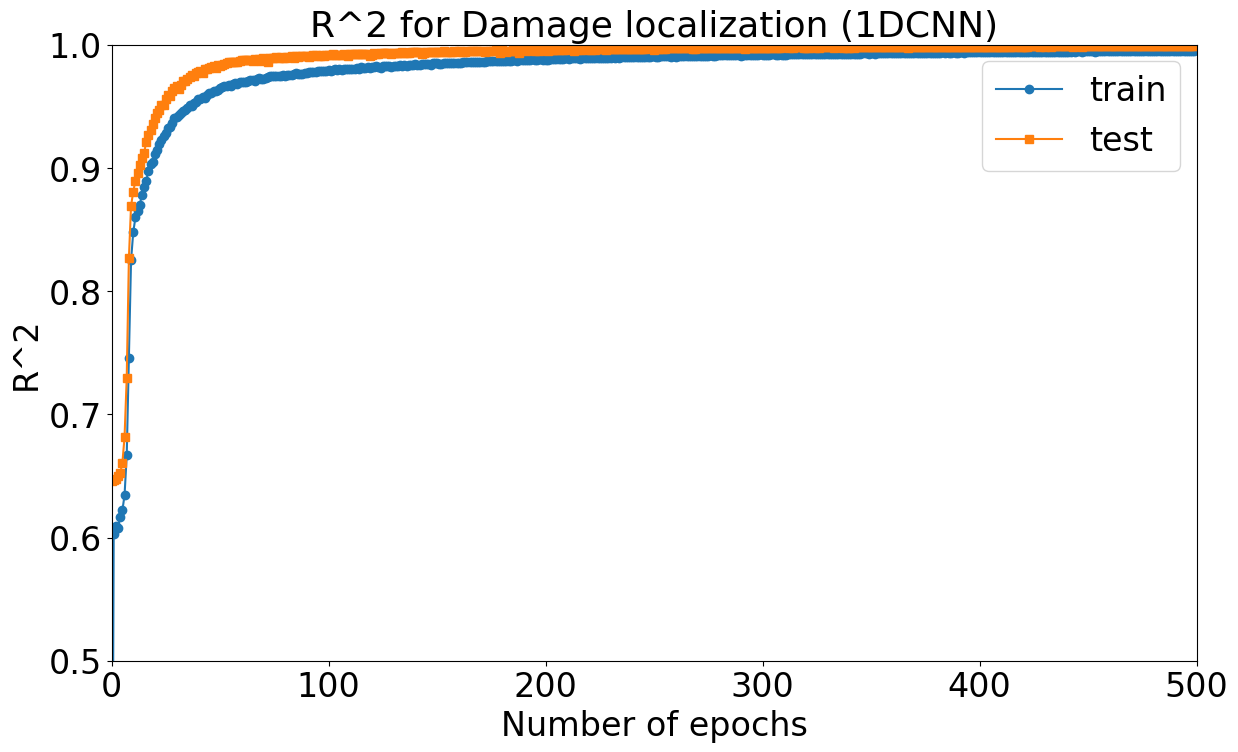

In [32]:
# call r2plot function
r2plot(history, 0.5, 1.0, 24, 0, 500)

In [35]:
pip install xlsxwriter


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:

pred(model,Xtest,ytest,'1DCNN_DamLocal.xlsx')

16/16 - 0s - 3ms/step


,True values (x),True values (a),Predicted values (x),Predicted values (a),APD (x),APD (a)
0,0.482653,0.008878,0.484375,0.013172,0.36,48.38
1,0.758163,0.070918,0.747257,0.066066,1.44,6.84
2,0.620408,0.065102,0.614781,0.070913,0.91,8.93
3,0.773469,0.086429,0.761215,0.088162,1.58,2.01
4,0.712245,0.045714,0.693768,0.057413,2.59,25.59
...,...,...,...,...,...,...
495,0.145918,0.043776,0.153451,0.048976,5.16,11.88
496,0.773469,0.014694,0.763553,0.019465,1.28,32.47
497,0.100000,0.047653,0.104427,0.043051,4.43,9.66
498,0.773469,0.034082,0.761654,0.038767,1.53,13.75


In [39]:
df_Df100_Ax = pd.read_csv('/kaggle/input/test-data-damage-localization/Ax225_Df100_17Aug20.txt',header=None)
df_Df100_Flex = pd.read_csv('/kaggle/input/test-data-damage-localization/Flex225_Df100_17Aug20.txt',header=None)

df_Df150_Ax = pd.read_csv('/kaggle/input/test-data-damage-localization/Ax225_Df150_17Aug20.txt',header=None)
df_Df150_Flex = pd.read_csv('/kaggle/input/test-data-damage-localization/Flex225_Df150_17Aug20.txt',header=None)

y100 = pd.read_excel('/kaggle/input/test-data-damage-localization/labels100.xlsx',header=None)
y150 = pd.read_csv('/kaggle/input/test-data-damage-localization/labels150.csv',header=None)

In [41]:
print(df_Df100_Ax.shape)
print(df_Df100_Flex.shape)
print(y100.shape)

print(df_Df150_Ax.shape)
print(df_Df150_Flex.shape)
print(y150.shape)

(225, 8192)
(225, 8192)
(225, 2)
(225, 8192)
(225, 8192)
(225, 2)


In [42]:
DAx100 = df_Df100_Ax.iloc[:, 0 : index]
DFlex100 = df_Df100_Flex.iloc[:, 0 : index]

DAx150 = df_Df150_Ax.iloc[:, 0 : index]
DFlex150 = df_Df150_Flex.iloc[:, 0 : index]

In [43]:
Xpred = DAx150  + DFlex150 # DAx150  + DFlex150 
Xpred = np.array(Xpred)
ypred = np.array(y150)/1000
print(Xpred.shape)
print(ypred.shape)

(225, 2000)
(225, 2)


In [44]:
ypred

array([[0.1       , 0.02      ],
       [0.1       , 0.02464286],
       [0.1       , 0.02928571],
       [0.1       , 0.03392857],
       [0.1       , 0.03857143],
       [0.1       , 0.04321429],
       [0.1       , 0.04785714],
       [0.1       , 0.0525    ],
       [0.1       , 0.05714286],
       [0.1       , 0.06178571],
       [0.1       , 0.06642857],
       [0.1       , 0.07107143],
       [0.1       , 0.07571429],
       [0.1       , 0.08035714],
       [0.1       , 0.085     ],
       [0.15357143, 0.02      ],
       [0.15357143, 0.02464286],
       [0.15357143, 0.02928571],
       [0.15357143, 0.03392857],
       [0.15357143, 0.03857143],
       [0.15357143, 0.04321429],
       [0.15357143, 0.04785714],
       [0.15357143, 0.0525    ],
       [0.15357143, 0.05714286],
       [0.15357143, 0.06178571],
       [0.15357143, 0.06642857],
       [0.15357143, 0.07107143],
       [0.15357143, 0.07571429],
       [0.15357143, 0.08035714],
       [0.15357143, 0.085     ],
       [0.

In [45]:
# call pred function
pred(model,Xpred,ypred,'1DCNN_DamLocal_pred150.xlsx')

8/8 - 0s - 52ms/step


,True values (x),True values (a),Predicted values (x),Predicted values (a),APD (x),APD (a)
0,0.10,0.020000,0.184171,0.050104,84.17,150.52
1,0.10,0.024643,0.185580,0.052793,85.58,114.23
2,0.10,0.029286,0.187369,0.056630,87.37,93.37
3,0.10,0.033929,0.195908,0.064537,95.91,90.21
4,0.10,0.038571,0.197488,0.071402,97.49,85.12
...,...,...,...,...,...,...
220,0.85,0.066429,0.175427,0.035164,79.36,47.06
221,0.85,0.071071,0.173569,0.038468,79.58,45.87
222,0.85,0.075714,0.173935,0.040512,79.54,46.49
223,0.85,0.080357,0.177624,0.044957,79.10,44.05


SNR :  8.75163306625117
115


Text(0.5, 1.0, 'Dam')

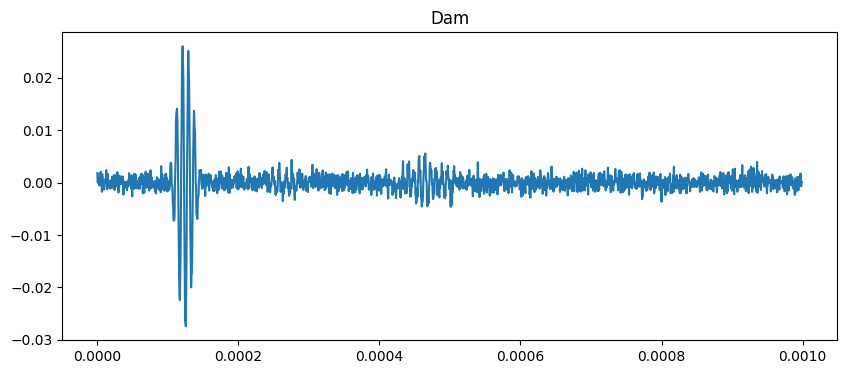

In [46]:
beta4 = 0.042
r = sigma*np.random.randn(2000,1) + mu   #random parameter with gaussian distribution
r = np.transpose(r)

#---Noisy signal
n4 = beta4*r*np.max(X)
Xn4 = X + n4

n = random.sample(range(1, Xn4.shape[0]), 225)
Xn4 = Xn4[n,:] # Xn should be defined
yn4 = y[n]   # yn should be defined
    
#---Signal to noise ratio
import math

rms_Xn4 = np.sqrt(np.mean(Xn4**2))
Power_Xn4 = rms_Xn4**2

rms_n4 = np.sqrt(np.mean(n4**2))
Power_n4 = rms_n4**2

SNR_dB = 10*math.log10(Power_Xn4/Power_n4)
print("SNR : ",SNR_dB)
SNR :  8.285566807265615
#---Plot non-noisy signal
Dp = random.randint(1, 225)
print(Dp)

plt.figure(figsize=(10,4))
plt.plot(time[0:index-1], Xn4[Dp, 0 : index-1])
plt.title('Dam')

In [47]:
# call pred function
pred(model,Xn4,yn4,'1DCNN_DamLocal_predNoise.xlsx')

8/8 - 0s - 4ms/step


,True values (x),True values (a),Predicted values (x),Predicted values (a),APD (x),APD (a)
0,0.145918,0.100000,0.175107,0.071364,20.00,28.64
1,0.207143,0.084490,0.222298,0.077088,7.32,8.76
2,0.191837,0.012755,0.202222,0.014834,5.41,16.30
3,0.100000,0.076735,0.155659,0.063557,55.66,17.17
4,0.605102,0.053469,0.600620,0.055435,0.74,3.68
...,...,...,...,...,...,...
220,0.268367,0.086429,0.293624,0.079126,9.41,8.45
221,0.130612,0.068980,0.170113,0.061839,30.24,10.35
222,0.696939,0.072857,0.661330,0.065275,5.11,10.41
223,0.742857,0.055408,0.701381,0.055294,5.58,0.21
